# **TikTok Project**
**Course 6 - The Nuts and bolts of machine learning**

Recall that you are a data professional at TikTok. Your supervisor was impressed with the work you have done and has requested that you build a machine learning model that can be used to determine whether a video contains a claim or whether it offers an opinion. With a successful prediction model, TikTok can reduce the backlog of user reports and prioritize them more efficiently.

A notebook was structured and prepared to help you in this project. A notebook was structured and prepared to help you in this project. Please complete the following questions.

# **Course 6 End-of-course project: Classifying videos using machine learning**

In this activity, you will practice using machine learning techniques to predict on a binary outcome variable.
<br/>

**The purpose** of this model is to increase response time and system efficiency by automating the initial stages of the claims process.

**The goal** of this model is to predict whether a TikTok video presents a "claim" or presents an "opinion".
<br/>

*This activity has three parts:*

**Part 1:** Ethical considerations
* Consider the ethical implications of the request

* Should the objective of the model be adjusted?

**Part 2:** Feature engineering

* Perform feature selection, extraction, and transformation to prepare the data for modeling

**Part 3:** Modeling

* Build the models, evaluate them, and advise on next steps

Follow the instructions and answer the questions below to complete the activity. Then, you will complete an Executive Summary using the questions listed on the PACE Strategy Document.

Be sure to complete this activity before moving on. The next course item will provide you with a completed exemplar to compare to your own work.



# **Classify videos using machine learning**

<img src="images/Pace.png" width="100" height="100" align=left>

# **PACE stages**


Throughout these project notebooks, you'll see references to the problem-solving framework PACE. The following notebook components are labeled with the respective PACE stage: Plan, Analyze, Construct, and Execute.

<img src="images/Plan.png" width="100" height="100" align=left>


## **PACE: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following questions:


1.   **What are you being asked to do? What metric should I use to evaluate success of my business/organizational objective?**

2.   **What are the ethical implications of the model? What are the consequences of your model making errors?**
  *   What is the likely effect of the model when it predicts a false negative (i.e., when the model says a video does not contain a claim and it actually does)?

  *   What is the likely effect of the model when it predicts a false positive (i.e., when the model says a video does contain a claim and it actually does not)?

3.   **How would you proceed?**


==> ENTER YOUR RESPONSES HERE

Recall should be the metric for sucess due to a false negative would allow for submissions that might be breaking terms of service to circulate. While a false positive, a video that does not contain a claim is marked as a claim, this may cause unneeded censurship, but will allow for the community to remain safe. 

censorship could cause some initial ethical concerns but with proper follow up and monitoring, the community can remain safe while still speeding up the claims process. 

### **Task 1. Imports and data loading**

Start by importing packages needed to build machine learning models to achieve the goal of this project.

In [1]:
# Import packages for data manipulation
### YOUR CODE HERE ###
import numpy as np
import pandas as pd

# Import packages for data visualization
### YOUR CODE HERE ###
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from xgboost import plot_importance


# Import packages for data preprocessing
### YOUR CODE HERE ###
from sklearn.model_selection import train_test_split, PredefinedSplit, GridSearchCV

# Import packages for data modeling
### YOUR CODE HERE ###
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import f1_score,precision_score, recall_score, accuracy_score

Now load the data from the provided csv file into a dataframe.

**Note:** As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [2]:
# Load dataset into dataframe
data = pd.read_csv("tiktok_dataset.csv")

<img src="images/Analyze.png" width="100" height="100" align=left>

## **PACE: Analyze**

Consider the questions in your PACE Strategy Document to reflect on the Analyze stage.

### **Task 2: Examine data, summary info, and descriptive stats**

Inspect the first five rows of the dataframe.

In [3]:
# Display first few rows
### YOUR CODE HERE ###
data.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


Get the number of rows and columns in the dataset.

In [4]:
# Get number of rows and columns
### YOUR CODE HERE ###
data.shape

(19382, 12)

Get the data types of the columns.

In [5]:
# Get data types of columns
### YOUR CODE HERE ###
data.dtypes

#                             int64
claim_status                 object
video_id                      int64
video_duration_sec            int64
video_transcription_text     object
verified_status              object
author_ban_status            object
video_view_count            float64
video_like_count            float64
video_share_count           float64
video_download_count        float64
video_comment_count         float64
dtype: object

Get basic information about the dataset.

In [6]:
# Get basic information
### YOUR CODE HERE ###
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19382 entries, 0 to 19381
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   #                         19382 non-null  int64  
 1   claim_status              19084 non-null  object 
 2   video_id                  19382 non-null  int64  
 3   video_duration_sec        19382 non-null  int64  
 4   video_transcription_text  19084 non-null  object 
 5   verified_status           19382 non-null  object 
 6   author_ban_status         19382 non-null  object 
 7   video_view_count          19084 non-null  float64
 8   video_like_count          19084 non-null  float64
 9   video_share_count         19084 non-null  float64
 10  video_download_count      19084 non-null  float64
 11  video_comment_count       19084 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 1.8+ MB


Generate basic descriptive statistics about the dataset.

In [7]:
# Generate basic descriptive stats
### YOUR CODE HERE ###
data.describe(include='all')

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
count,19382.000000,19084,1.938200e+04,19382.000000,19084,19382,19382,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000
unique,NaN,2,NaN,NaN,19012,2,3,NaN,NaN,NaN,NaN,NaN
top,NaN,claim,NaN,NaN,a friend read in the media a claim that badmi...,not verified,active,NaN,NaN,NaN,NaN,NaN
freq,NaN,9608,NaN,NaN,2,18142,15663,NaN,NaN,NaN,NaN,NaN
mean,9691.500000,NaN,5.627454e+09,32.421732,NaN,NaN,NaN,254708.558688,84304.636030,16735.248323,1049.429627,349.312146
std,5595.245794,NaN,2.536440e+09,16.229967,NaN,NaN,NaN,322893.280814,133420.546814,32036.174350,2004.299894,799.638865
min,1.000000,NaN,1.234959e+09,5.000000,NaN,NaN,NaN,20.000000,0.000000,0.000000,0.000000,0.000000
25%,4846.250000,NaN,3.430417e+09,18.000000,NaN,NaN,NaN,4942.500000,810.750000,115.000000,7.000000,1.000000
50%,9691.500000,NaN,5.618664e+09,32.000000,NaN,NaN,NaN,9954.500000,3403.500000,717.000000,46.000000,9.000000
75%,14536.750000,NaN,7.843960e+09,47.000000,NaN,NaN,NaN,504327.000000,125020.000000,18222.000000,1156.250000,292.000000


Check for and handle missing values.

In [8]:
# Check for missing values
### YOUR CODE HERE ###
data.isnull().sum()

#                             0
claim_status                298
video_id                      0
video_duration_sec            0
video_transcription_text    298
verified_status               0
author_ban_status             0
video_view_count            298
video_like_count            298
video_share_count           298
video_download_count        298
video_comment_count         298
dtype: int64

In [9]:
# Drop rows with missing values
### YOUR CODE HERE ###
df1 = data.dropna(axis = 0)

In [10]:

# Display first few rows after handling missing values
### YOUR CODE HERE ###
df1.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


Check for and handle duplicates.

In [11]:
df1.isnull().sum()

#                           0
claim_status                0
video_id                    0
video_duration_sec          0
video_transcription_text    0
verified_status             0
author_ban_status           0
video_view_count            0
video_like_count            0
video_share_count           0
video_download_count        0
video_comment_count         0
dtype: int64

In [12]:
# Check for duplicates
### YOUR CODE HERE ###
df1.duplicated().sum()

0

Check for and handle outliers.

In [13]:
df2 = df1.copy()

In [14]:
df2.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


In [15]:
### YOUR CODE HERE ###
outlier_checks = ["video_duration_sec","video_view_count","video_like_count", "video_share_count", "video_download_count", "video_comment_count"]
for count, column in enumerate(outlier_checks):
    
    print(f"iteration {count}")
    #build IQR mask
    lower_quantile = df2[column].quantile(0.25)
    upper_quantile = df2[column].quantile(0.75)
    iqr = upper_quantile-lower_quantile
    lower = lower_quantile - 1.5*iqr
    upper = upper_quantile + 1.5*iqr
    outlier_mask = (df2[column] >= lower) & (df2[column] <= upper)
    
    #apply IQR mask and elimate outliers 
    print(outlier_mask.sum())
#     print(f"data set {df2[column].shape} \nmask set {df2[outlier_mask].shape}")
#     print(df2[outlier_mask].head())
    df2 = df2[outlier_mask]

iteration 0
19084
iteration 1
19084
iteration 2
17358
iteration 3
14911
iteration 4
12315
iteration 5
10409


In [16]:
df3 = df1.copy()

In [17]:
outlier_checks = ["video_duration_sec","video_view_count","video_like_count", "video_share_count", "video_download_count", "video_comment_count"]
for count, column in enumerate(outlier_checks):
    
    print(f"iteration {count}")
    #build IQR mask
    lower_quantile = df1[column].quantile(0.25)
    upper_quantile = df1[column].quantile(0.75)
    iqr = upper_quantile-lower_quantile
    lower = lower_quantile - 1.5*iqr
    upper = upper_quantile + 1.5*iqr
    outlier_mask = (df3[column] >= lower) & (df3[column] <= upper)
    
    #apply IQR mask and elimate outliers 
    print(outlier_mask.sum())
#     print(f"data set {df2[column].shape} \nmask set {df2[outlier_mask].shape}")
#     print(df2[outlier_mask].head())
    df3 = df3[outlier_mask]

iteration 0
19084
iteration 1
19084
iteration 2
17358
iteration 3
16084
iteration 4
15437
iteration 5
14851


Check class balance.

In [18]:
# Check class balance
### YOUR CODE HERE ###
df3['claim_status'].value_counts()/len(df3['claim_status']) * 100

claim_status
opinion    63.807151
claim      36.192849
Name: count, dtype: float64

<img src="images/Construct.png" width="100" height="100" align=left>

## **PACE: Construct**
Consider the questions in your PACE Strategy Document to reflect on the Construct stage.

### **Task 3: Feature engineering**

Extract the length of each `video_transcription_text` and add this as a column to the dataframe, so that it can be used as a potential feature in the model.

In [19]:
# Extract the length of each `video_transcription_text` and add this as a column to the dataframe
### YOUR CODE HERE ###
df3["transcription_text_length"] = df3["video_transcription_text"].str.len()
df3.head(3)

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,transcription_text_length
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0,97
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0,107
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0,137


Calculate the average text_length for claims and opinions.

In [20]:
# Calculate the average text_length for claims and opinions
### YOUR CODE HERE ###
text_len_sum = df3.groupby(["claim_status"])["transcription_text_length"].mean()

print(text_len_sum)

claim_status
claim      95.654884
opinion    82.722562
Name: transcription_text_length, dtype: float64


Visualize the distribution of `text_length` for claims and opinions.

In [21]:
df3[df3["claim_status"]=="claim"].head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,transcription_text_length
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0,97
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0,107
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0,137
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0,131
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0,128


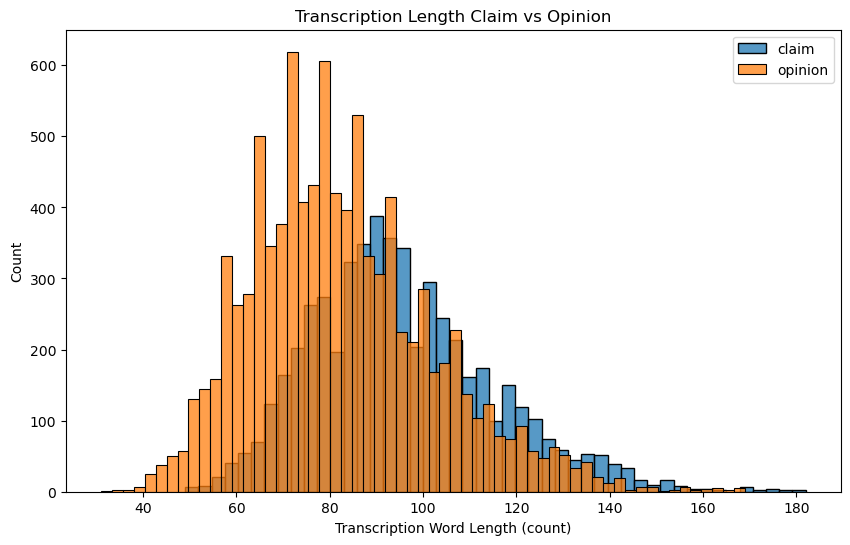

In [22]:
# Visualize the distribution of `text_length` for claims and opinions
# Create two histograms in one plot
### YOUR CODE HERE ###
plt.figure(figsize= (10,6))
sns.histplot(data = df3[df3["claim_status"]=="claim"], x = 'transcription_text_length', label='claim')
sns.histplot(data = df3[df3["claim_status"]=="opinion"], x = 'transcription_text_length', label='opinion')
plt.xlabel("Transcription Word Length (count)")
plt.title("Transcription Length Claim vs Opinion")
plt.legend()
plt.show()

**Feature selection and transformation**

Encode target and catgorical variables.

In [23]:
df3.head(1)

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,transcription_text_length
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0,97


In [24]:
# Create a copy of the X data
### YOUR CODE HERE ###
df4 = df3.copy()
# Drop unnecessary columns
### YOUR CODE HERE ###
df4.drop(columns = ["#","video_id", "video_transcription_text"], inplace= True)
# Encode target variable
### YOUR CODE HERE ###
df4.replace(to_replace={'opinion':0, 'claim':1}, inplace=True)
# Dummy encode remaining categorical values
### YOUR CODE HERE ###
df4 = pd.get_dummies(data = df4, columns = ["verified_status", "author_ban_status"], drop_first = True, dtype='int64')

### **Task 4: Split the data**

Assign target variable.

In [25]:
# Isolate target variable
### YOUR CODE HERE ###
y = df4["claim_status"]

Isolate the features.

In [26]:
# Isolate features
### YOUR CODE HERE ###
X = df4.copy().drop(columns = ["claim_status"])
# Display first few rows of features dataframe
### YOUR CODE HERE ###
X.head()

,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,transcription_text_length,verified_status_verified,author_ban_status_banned,author_ban_status_under review
0,59,343296.0,19425.0,241.0,1.0,0.0,97,0,0,1
1,32,140877.0,77355.0,19034.0,1161.0,684.0,107,0,0,0
2,31,902185.0,97690.0,2858.0,833.0,329.0,137,0,0,0
3,25,437506.0,239954.0,34812.0,1234.0,584.0,131,0,0,0
4,19,56167.0,34987.0,4110.0,547.0,152.0,128,0,0,0


#### **Task 5: Create train/validate/test sets**

Split data into training and testing sets, 80/20.

In [27]:
# Split the data into training and testing sets
### YOUR CODE HERE ###
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.20, random_state=42)

Split the training set into training and validation sets, 75/25, to result in a final ratio of 60/20/20 for train/validate/test sets.

In [28]:
# Split the training data into training and validation sets
### YOUR CODE HERE ###
X_tr,X_validate,y_tr,y_validate = train_test_split(X_train,y_train, test_size=0.25, random_state=42)

Confirm that the dimensions of the training, validation, and testing sets are in alignment.

In [29]:
# Get shape of each training, validation, and testing set
### YOUR CODE HERE ###
print(f"Xtrain {X_train.shape} \nXtr {X_tr.shape} \nXvalidate {X_validate.shape} \nXtest {X_test.shape} \nytrain {y_train.shape} \nytr {y_tr.shape} \nyvalidate {y_validate.shape} \nytest {y_test.shape}")


Xtrain (11880, 10) 
Xtr (8910, 10) 
Xvalidate (2970, 10) 
Xtest (2971, 10) 
ytrain (11880,) 
ytr (8910,) 
yvalidate (2970,) 
ytest (2971,)


### **Task 6. Build models**


### **Build a random forest model**

Fit a random forest model to the training set. Use cross-validation to tune the hyperparameters and select the model that performs best on recall.

In [30]:
# Instantiate the random forest classifier
### YOUR CODE HERE ###
random_forest = RandomForestClassifier(random_state=42)
# Create a dictionary of hyperparameters to tune
### YOUR CODE HERE ###
cv_params = {'n_estimators' : [50,100], 
              'max_depth' : [10,50],        
              'min_samples_leaf' : [0.5,1], 
              'min_samples_split' : [0.001, 0.01],
              'max_features' : ["sqrt"], 
              'max_samples' : [.5,.9]}

# Define a dictionary of scoring metrics to capture
### YOUR CODE HERE ###
scoring_metrics = {'accuracy', 'precision', 'recall', 'f1'}


# Instantiate the GridSearchCV object
### YOUR CODE HERE ###
rf_validate = GridSearchCV(random_forest, cv_params, cv=5, refit='recall', n_jobs = -1, verbose = 1, scoring=scoring_metrics)

In [31]:
rf_validate.fit(X_tr,y_tr)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


/opt/conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defin

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [10, 50], 'max_features': ['sqrt'],
                         'max_samples': [0.5, 0.9],
                         'min_samples_leaf': [0.5, 1],
                         'min_samples_split': [0.001, 0.01],
                         'n_estimators': [50, 100]},
             refit='recall', scoring={'precision', 'f1', 'accuracy', 'recall'},
             verbose=1)

In [32]:
# Examine best recall score
### YOUR CODE HERE ###
rf_validate.best_score_

0.9799500591147021

In [38]:
  # Get all the results from the CV and put them in a df
### YOUR CODE HERE ###

# predict_validation = rf_validate.predict(X_validate)
# rf_accuracy_val = accuracy_score(y_pred, y_test)

  # Isolate the row of the df with the max(mean precision score)
### YOUR CODE HERE ###
def make_results(model_name, model_object):

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(mean f1 score
    
    best_estimator_results = cv_results.iloc[cv_results['mean_test_precision'].idxmax(), :]

    # Extract accuracy, precision, recall, and f1 score from that row
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy

    # Create table of results
        
    table = pd.DataFrame({'Model': [model_name],
                          'F1': [f1],
                          'Recall': [recall],
                          'Precision': [precision],
                          'Accuracy': [accuracy]
                         }
                        )
    return table
rf_results = make_results("Random Forest",rf_validate)
rf_results

,Model,F1,Recall,Precision,Accuracy
0,Random Forest,0.98907,0.979324,0.999041,0.992256


In [36]:
# Examine best parameters
### YOUR CODE HERE ###
rf_validate.best_params_

{'max_depth': 10,
 'max_features': 'sqrt',
 'max_samples': 0.9,
 'min_samples_leaf': 1,
 'min_samples_split': 0.001,
 'n_estimators': 50}

**Question:** How well is your model performing? Consider average recall score and precision score. The model is performing extremely well with the average recall: 0.9793 and the average precision: 0.9990

### **Build an XGBoost model**

In [39]:
# Instantiate the XGBoost classifier
### YOUR CODE HERE ###
xgboost = XGBClassifier(objective='binary:logistic', random_state=42) 


# Create a dictionary of hyperparameters to tune
### YOUR CODE HERE ###
cv_params_xgb = {
    'max_depth': [4,6],
    'min_child_weight': [3,5],
    'learning_rate': [0.1],
    'n_estimators': [10, 30],
    'subsample': [0.7],
    'colsample_bytree': [0.7]
}

# Define a dictionary of scoring metrics to capture
### YOUR CODE HERE ###

scoring_xgb = {'accuracy', 'precision', 'recall', 'f1'}

# Instantiate the GridSearchCV object
### YOUR CODE HERE ###
xgb_validate = GridSearchCV(xgboost, cv_params_xgb, scoring=scoring_xgb, cv=5, refit='recall')


In [41]:
xgb_validate.fit(X_tr,y_tr)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=42, ...),
             param_grid={'colsample_bytree': [0.7], 'learning_rate': [0.1],
                         'max_depth': [4, 6], 'min_child_weight': [3, 5],
                         'n_estimators': [10, 30], 'subsample': [0.7]},
             refit='recall', scoring={'precision', 'f1', 'accuracy', 'recall'})

In [42]:
  # Get all the results from the CV and put them in a df
### YOUR CODE HERE ###

  # Isolate the row of the df with the max(mean precision score)
### YOUR CODE HERE ###

xgb_results = make_results("XGBoost",xgb_validate)
xgb_results

,Model,F1,Recall,Precision,Accuracy
0,XGBoost,0.990018,0.980263,1.0,0.992929


**Question:** How well does your model perform? Consider recall score and precision score. This model performs even better with the precision of 1.000 and the recall of 0.9802. Very accurate, although it may be over fit

<img src="images/Execute.png" width="100" height="100" align=left>

## **PACE: Execute**
Consider the questions in your PACE Strategy Document to reflect on the Execute stage.

### **Task 7. Evaluate model**

Evaluate models against validation criteria.

#### **Random forest**

In [44]:
# Use the random forest "best estimator" model to get predictions on the encoded testing set
### YOUR CODE HERE ###
rf_pred_val = rf_validate.best_estimator_.predict(X_validate)

Display the predictions on the encoded testing set.

In [45]:
# Display the predictions on the encoded testing set
### YOUR CODE HERE ###
rf_pred_val

array([0, 0, 1, ..., 0, 0, 0])

Display the true labels of the testing set.

In [46]:
# Display the true labels of the testing set
### YOUR CODE HERE ###
y_validate

11807    0
17637    0
9244     1
16193    0
12300    0
        ..
17091    0
11236    0
13775    0
12612    0
16462    0
Name: claim_status, Length: 2970, dtype: int64

Create a confusion matrix to visualize the results of the classification model.

In [48]:
def confusion_matrix_plot(y_data,prediction, model):
    # y_data = y actual data
    # prediction = model predictions
    # model = trained model object
    cm = confusion_matrix(y_data, prediction,labels = model.classes_)
    plt.figure(figsize = (20,20))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
    disp.plot(values_format='')  # `values_format=''` suppresses scientific notation
    plt.show()

<Figure size 2000x2000 with 0 Axes>

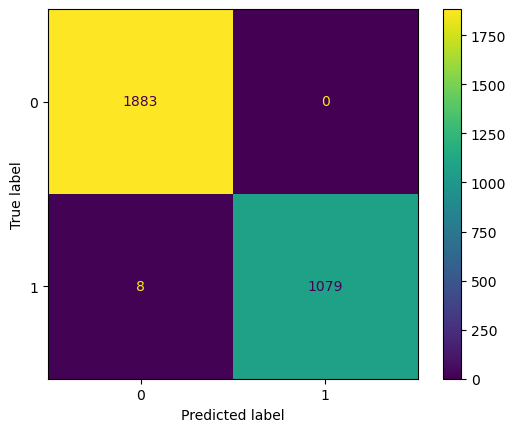

In [49]:
# Create a confusion matrix to visualize the results of the classification model

# Compute values for confusion matrix
### YOUR CODE HERE ###

# Create display of confusion matrix
### YOUR CODE HERE ###

# Plot confusion matrix
### YOUR CODE HERE ###

# Display plot
### YOUR CODE HERE ###
confusion_matrix_plot(y_data=y_validate,prediction=rf_pred_val, model = rf_validate)

Create a classification report that includes precision, recall, f1-score, and accuracy metrics to evaluate the performance of the model.

In [50]:
# Create a classification report
# Create classification report for random forest model
### YOUR CODE HERE ###
from sklearn.metrics import classification_report
target_labels = ['opinion', 'claim']

In [52]:
print(classification_report(y_validate,rf_pred_val,target_names=target_labels))

              precision    recall  f1-score   support

     opinion       1.00      1.00      1.00      1883
       claim       1.00      0.99      1.00      1087

    accuracy                           1.00      2970
   macro avg       1.00      1.00      1.00      2970
weighted avg       1.00      1.00      1.00      2970



**Question:** What does your classification report show? What does the confusion matrix indicate?

#### **XGBoost**

In [53]:
#Evaluate XGBoost model
### YOUR CODE HERE ###
xgb_pred_val = xgb_validate.best_estimator_.predict(X_validate)

In [54]:
xgb_pred_val

array([0, 0, 1, ..., 0, 0, 0])

<Figure size 2000x2000 with 0 Axes>

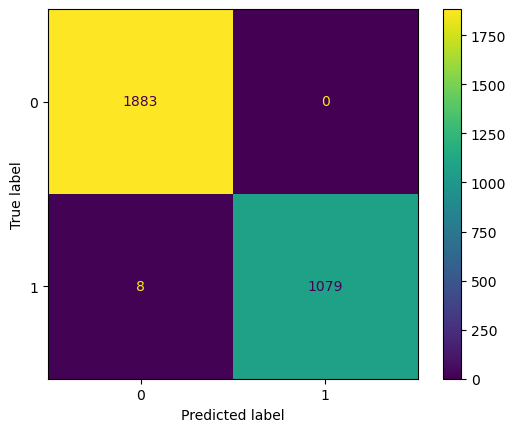

In [55]:
# Compute values for confusion matrix
### YOUR CODE HERE ###

# Create display of confusion matrix
### YOUR CODE HERE ###

# Plot confusion matrix
### YOUR CODE HERE ###

# Display plot
### YOUR CODE HERE ###
confusion_matrix_plot(y_data=y_validate,prediction=xgb_pred_val, model = xgb_validate)

In [56]:
# Create a classification report
### YOUR CODE HERE ###
print(classification_report(y_validate,xgb_pred_val,target_names=target_labels))

              precision    recall  f1-score   support

     opinion       1.00      1.00      1.00      1883
       claim       1.00      0.99      1.00      1087

    accuracy                           1.00      2970
   macro avg       1.00      1.00      1.00      2970
weighted avg       1.00      1.00      1.00      2970



**Question:** Describe your XGBoost model results. How does your XGBoost model compare to your random forest model?
The models produced identical confusion matrices and classification reports, although judging from the average scores from training the XGBoost model is performing slightly better than the Random Forest. 

### **Use champion model to predict on test data**

In [57]:
### YOUR CODE HERE ###
xgb_pred_TEST = xgb_validate.best_estimator_.predict(X_test)

In [59]:
rf_pred_TEST = rf_validate.best_estimator_.predict(X_test)

<Figure size 2000x2000 with 0 Axes>

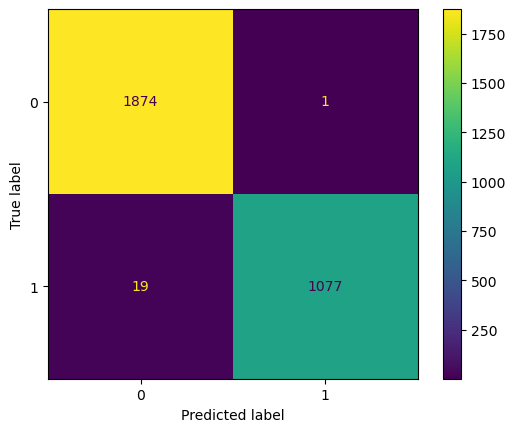

In [58]:
# Compute values for confusion matrix
### YOUR CODE HERE ###

# Create display of confusion matrix
### YOUR CODE HERE ###

# Plot confusion matrix
### YOUR CODE HERE ###

# Display plot
### YOUR CODE HERE ###
confusion_matrix_plot(y_data=y_test,prediction=xgb_pred_TEST, model = xgb_validate)

<Figure size 2000x2000 with 0 Axes>

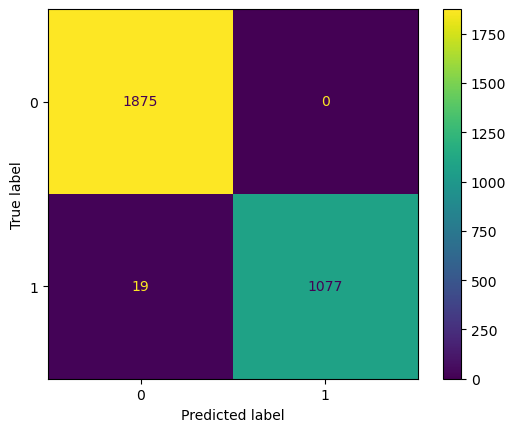

In [60]:
confusion_matrix_plot(y_data=y_test,prediction=rf_pred_TEST, model = rf_validate)

Actually upon exposing both models to the testing data, the Random Forest has given a better prediction.

#### **Feature importances of champion model**


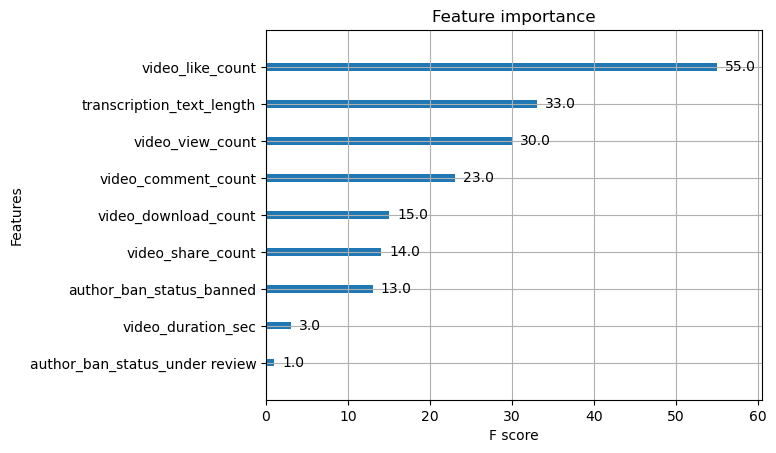

In [62]:
### YOUR CODE HERE ###
plot_importance(xgb_validate.best_estimator_);
plt.show()

In [72]:
importances = rf_validate.best_estimator_.feature_importances_
feature_names = X.columns

In [73]:
feature_imp_df = pd.DataFrame({'Feature': feature_names, 'Gini Importance': importances}).sort_values('Gini Importance', ascending=False) 
print(feature_imp_df)


                          Feature  Gini Importance
1                video_view_count         0.440667
2                video_like_count         0.327324
5             video_comment_count         0.090159
3               video_share_count         0.081526
4            video_download_count         0.050805
6       transcription_text_length         0.006283
8        author_ban_status_banned         0.001953
0              video_duration_sec         0.000950
9  author_ban_status_under review         0.000278
7        verified_status_verified         0.000057


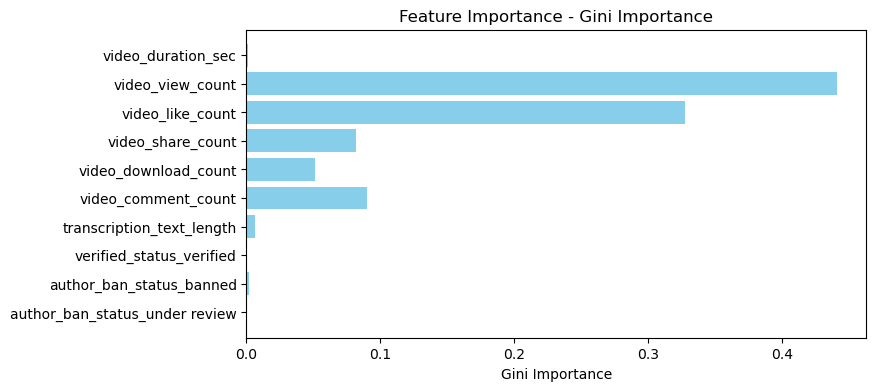

In [74]:
plt.figure(figsize=(8, 4))
plt.barh(feature_names, importances, color='skyblue')
plt.xlabel('Gini Importance')
plt.title('Feature Importance - Gini Importance')
plt.gca().invert_yaxis()  # Invert y-axis for better visualization
plt.show()

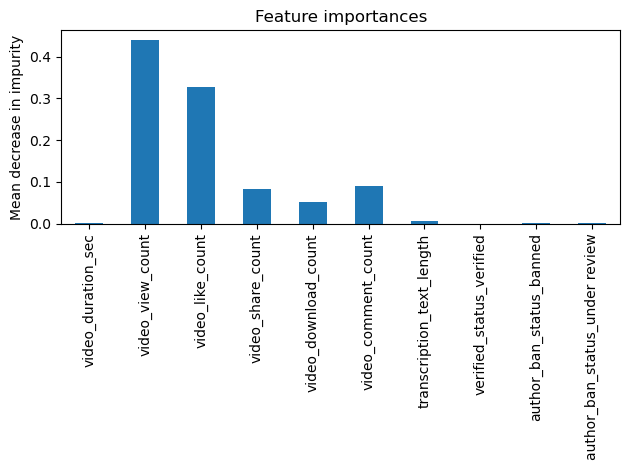

In [77]:
##### Answer ######

importances = rf_validate.best_estimator_.feature_importances_
rf_importances = pd.Series(importances, index=X_test.columns)

fig, ax = plt.subplots()
rf_importances.plot.bar(ax=ax)
ax.set_title('Feature importances')
ax.set_ylabel('Mean decrease in impurity')
fig.tight_layout()

**Question:** Describe your most predictive features. Were your results surprising? Due to the closeness of the preductive outputs of the two models I decided to view the importance and effectiveness of the prediction on the test sets. The random forest appears to be have a slightly better predictive ability. 

RF puts importance in the views, likes, and comments most, three indicators of high community engagement. While XGB puts importance in the likes, views, and the length of the transcript. the amount of words said in a video feels like a very ambiguous feature to be putting a lot of weight on. 

### **Task 8. Conclusion**

In this step use the results of the models above to formulate a conclusion. Consider the following questions:

1. **Would you recommend using this model? Why or why not?**

2. **What was your model doing? Can you explain how it was making predictions?**

3. **Are there new features that you can engineer that might improve model performance?**

4. **What features would you want to have that would likely improve the performance of your model?**

Remember, sometimes your data simply will not be predictive of your chosen target. This is common. Machine learning is a powerful tool, but it is not magic. If your data does not contain predictive signal, even the most complex algorithm will not be able to deliver consistent and accurate predictions. Do not be afraid to draw this conclusion.


==> ENTER YOUR RESPONSES HERE
1: The random forest model appears to be very accuractely and consistently predicting across both training, validating and testing sets. I would recommend it for this role of predicting whether a video submission is a 'claim' or 'opinion' a reasonable confidence of good performance. 
2: The random forest model was basing its predictions off of majorly 5 features: views, likes, shares, comments, and downloads. This are all indicative of community engagement. 
3: We could potentially improve and streamline this model by creating features such as: words/sec, likes/sec, ban status vs a categorizing of likes (low, medium, high). 
4: Features that could improve the performance of the model: age of user, age of account, and country/region

answer:

Would you recommend using this model? Why or why not? Yes, one can recommend this model because it performed well on both the validation and test holdout data. Furthermore, both precision and F1 scores were consistently high. The model very successfully classified claims and opinions.
What was your model doing? Can you explain how it was making predictions? The model's most predictive features were all related to the user engagement levels associated with each video. It was classifying videos based on how many views, likes, shares, and downloads they received.
Are there new features that you can engineer that might improve model performance? Because the model currently performs nearly perfectly, there is no need to engineer any new features.
What features would you want to have that would likely improve the performance of your model? The current version of the model does not need any new features. However, it would be helpful to have the number of times the video was reported. It would also be useful to have the total number of user reports for all videos posted by each author.

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.